<a href="https://colab.research.google.com/github/williamG7/The-PlayList/blob/main/The_Playlist_GuzmanWilliam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Playlist

![the-playlist](https://musiccustodian.com/wp-content/uploads/2025/01/Spotify.jpg)

# Objectivo

A partir de los [datos de 32.000 canciones de Spotify](https://raw.githubusercontent.com/raimonizard/datasets/refs/heads/main/spotify_songs_sub.csv), crear un **model de regresión logística** que permita **determinar la tipología de música de cada canción** en función de sus características determinadas por unos indicadores.

Este conjunto de datos está diseñado para **entrenar algoritmos de decisión** y, en este caso, para determinar la tipología de música de cada canción.
Incluye 32.000 muestras donde cada fila contiene los detalles de una canción con los siguientes atributos:

* **track_artist**: nombre del artista de la canción
* **danceability**: índice de bailabilidad de la canción
* **energy**: índice que cuantifica cuán energética es la pieza
* **key**: índice de parámetro musical
* **loudness**: índice que evalúa la cantidad de graves que contiene la canción
* **mode**: índice de parámetro musical
* **speechiness**: índice que evalúa cuánta letra cantada contiene la canción
* **acousticness**: índice que evalúa si la pieza está grabada en acústico
* **instrumentalness**: índice que evalúa si la canción es de tipo instrumental
* **liveness**: índice que evalúa si la canción ha sido grabada en un concierto en directo
* **valence**: índice de parámetro musical
* **tempo**: índice de parámetro musical
* **track_popularity**: índice que evalúa qué tan popular es la canción

El objetivo es determinar si las canciones son de tipo:
| id | song_genre |
| --- | --- |
| 0 | pop |
| 1 | rap |
| 2 | rock |
| 3 | latin |
| 4 | r&b |
| 5 | edm |

Nuestro objetivo es el de **analizar los datos (EDA)** y **entrenar un modelo de clasificación** usando una **regresión logística** que sea **capaz de catalogar las canciones por tipología** en función de las características determinadas por las variables independientes.

Por lo tanto, nuestra variable objetivo es **song_genre**.

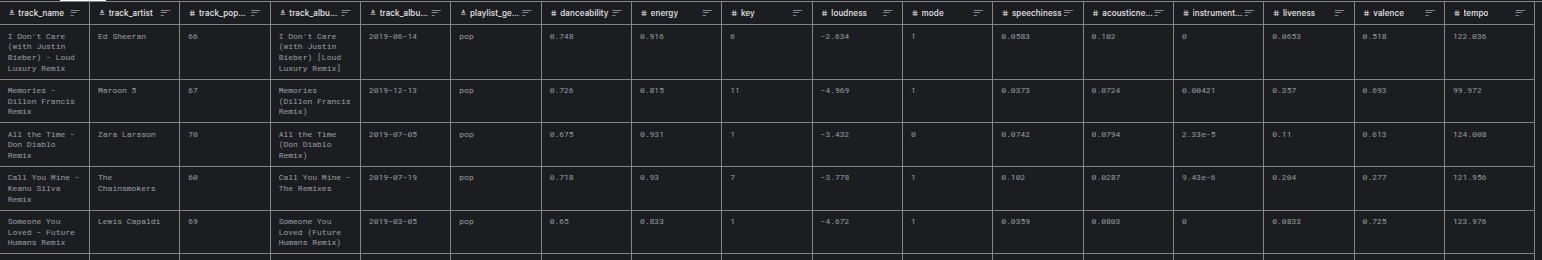

Una vez tengamos este modelo entrenado, analizaremos su precisión con el fin de valorar si es válido para ser usado para **determinar la tipología de música** de una canción si conocemos los datos de sus índices musicales.

---

## EDA

### Importacion de librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

### Cargar Dataset

In [2]:
url = 'https://raw.githubusercontent.com/raimonizard/datasets/refs/heads/main/spotify_songs_sub.csv'
df = pd.read_csv(url)
print(f"Dataset cargado: {df.shape[0]} Canciones {df.shape[1]} columnas")

Dataset cargado: 32833 Canciones 18 columnas


### Primeras filas

In [3]:
print("Primeras 5 filas del dataset")
df.head()

Primeras 5 filas del dataset


,track_name,track_artist,track_album_name,track_album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_popularity,song_genre
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,66,pop
1,Memories - Dillon Francis Remix,Maroon 5,Memories (Dillon Francis Remix),2019-12-13,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,67,pop
2,All the Time - Don Diablo Remix,Zara Larsson,All the Time (Don Diablo Remix),2019-07-05,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,70,pop
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,Call You Mine - The Remixes,2019-07-19,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,60,pop
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,Someone You Loved (Future Humans Remix),2019-03-05,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,69,pop


### Informacion general del dataset

In [4]:
print("Informacion general del dataset")
df.info()

Informacion general del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_name                32828 non-null  object 
 1   track_artist              32828 non-null  object 
 2   track_album_name          32828 non-null  object 
 3   track_album_release_date  32833 non-null  object 
 4   danceability              32833 non-null  float64
 5   energy                    32833 non-null  float64
 6   key                       32833 non-null  int64  
 7   loudness                  32833 non-null  float64
 8   mode                      32833 non-null  int64  
 9   speechiness               32833 non-null  float64
 10  acousticness              32833 non-null  float64
 11  instrumentalness          32833 non-null  float64
 12  liveness                  32833 non-null  float64
 13  valence                   328

### Valores nulos

In [5]:
print("valores nulos por columna:\n")
valoresNulos = df.isnull().sum()
print(valoresNulos)
print(f"total de valores nulos: {valoresNulos.sum()}")

valores nulos por columna:

track_name                  5
track_artist                5
track_album_name            5
track_album_release_date    0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
track_popularity            0
song_genre                  0
dtype: int64
total de valores nulos: 15


### Correlación entre columnas

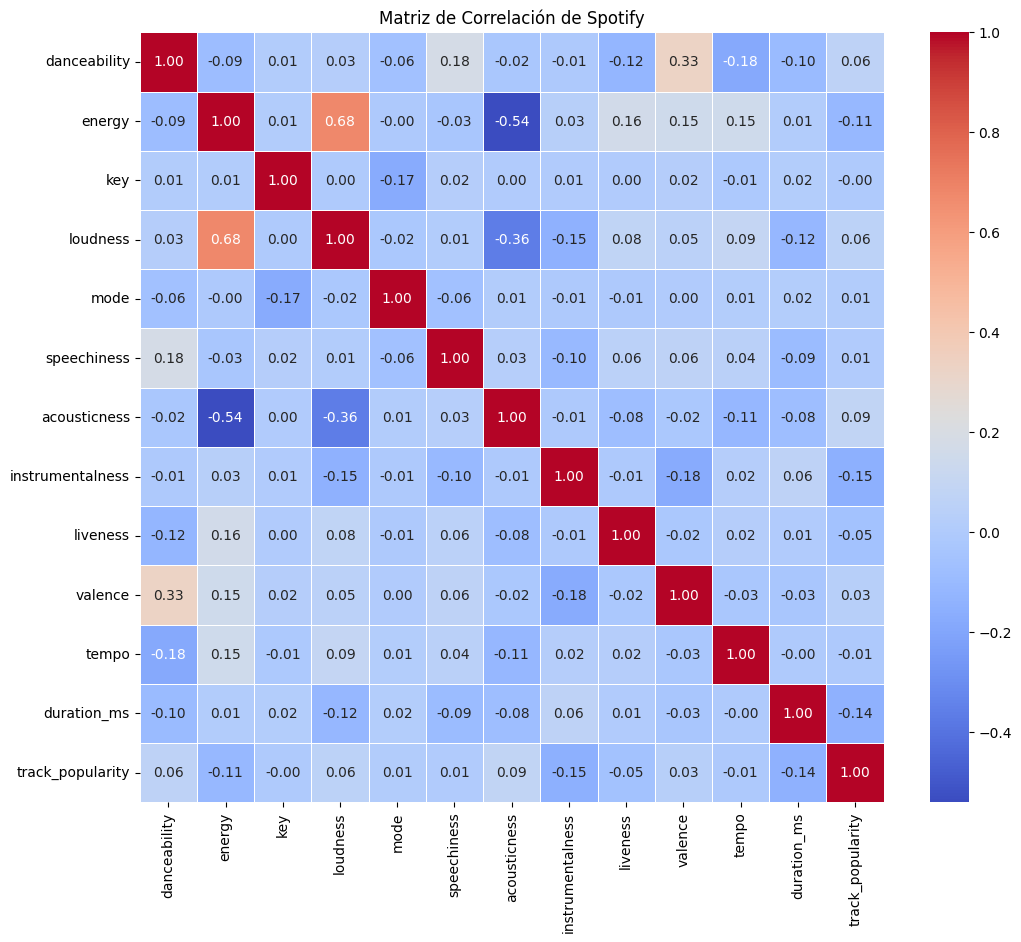

In [6]:
# seleccionar solo las columnas numericas para la correlacion
dfNumeric = df.select_dtypes(include=['float64', 'int64'])

# calcular la matriz de correlacion
matrizCorrelacion = dfNumeric.corr()

# crear el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(matrizCorrelacion,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            linewidths=0.5)
plt.title('Matriz de Correlación de Spotify')
plt.show()

### Cuantas canciones hay por tipologia

Canciones por genero
song_genre
edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: count, dtype: int64


/tmp/ipython-input-3807461714.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteoGenero.index, y=conteoGenero.values, palette="viridis")


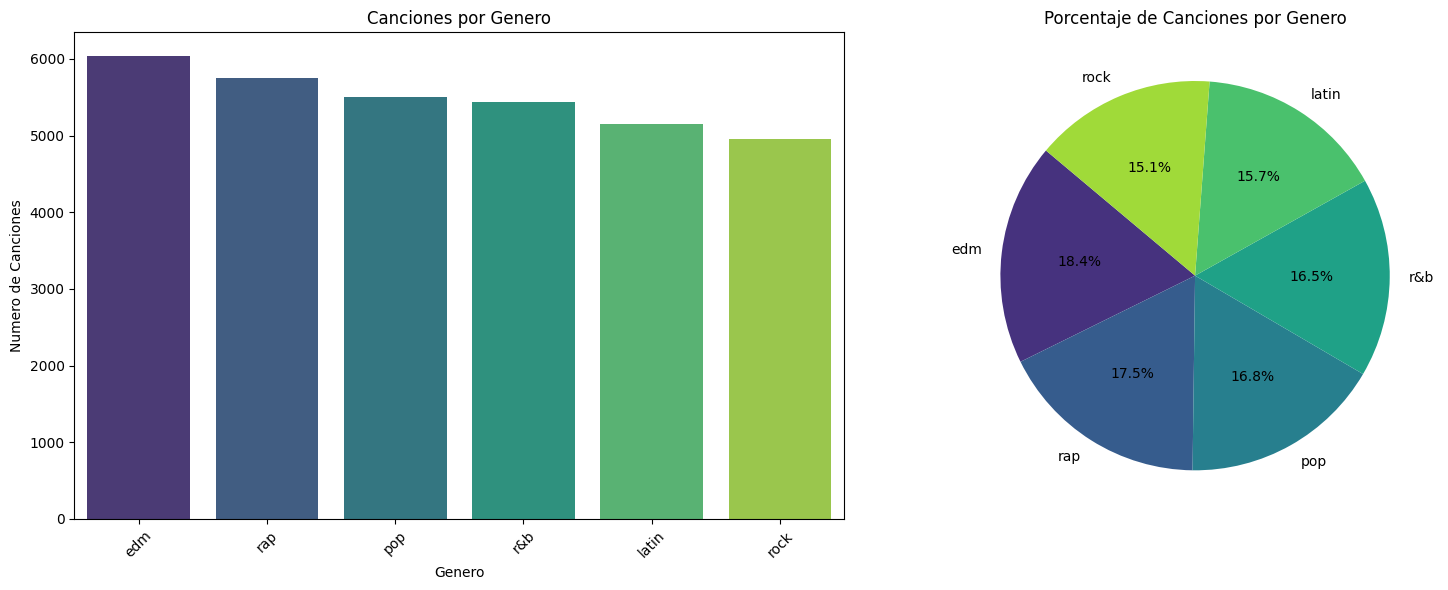

In [7]:
# canciones por genero
conteoGenero = df['song_genre'].value_counts()
print("Canciones por genero")
print(conteoGenero)

# tamaño de los graficos
plt.figure(figsize=(16, 6))

# diagrama de barras
plt.subplot(1, 2, 1)
sns.barplot(x=conteoGenero.index, y=conteoGenero.values, palette="viridis")
plt.title('Canciones por Genero')
plt.xlabel('Genero')
plt.ylabel('Numero de Canciones')
plt.xticks(rotation=45) # rotar las etiquetas para que se vean bien

# Piechart
plt.subplot(1, 2, 2)
plt.pie(conteoGenero,
        labels=conteoGenero.index,
        autopct='%1.1f%%', # porcentaje con un decimal
        startangle=140,
        colors=sns.color_palette('viridis', len(conteoGenero)))
plt.title('Porcentaje de Canciones por Genero')
plt.tight_layout() # ajusta espacios para los textos
plt.show()

### Cuantas canciones hay por artista

In [8]:
conteoArtistas = df['track_artist'].value_counts()
print("10 Artistas con mas canciones")
print(conteoArtistas.head(10))

print("\nEstadisticas")
print(conteoArtistas.count())
print(conteoArtistas.mean())

10 Artistas con mas canciones
track_artist
Martin Garrix                161
Queen                        136
The Chainsmokers             123
David Guetta                 110
Don Omar                     102
Drake                        100
Dimitri Vegas & Like Mike     93
Calvin Harris                 91
Hardwell                      84
Kygo                          83
Name: count, dtype: int64

Estadisticas
10692
3.0703329592218482


### Cuantas canciones se publicaron por año

In [9]:
# convertimos la columna de texto a formato fecha
df['fecha_formato'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')

# extraer el año
df['anio'] = df['fecha_formato'].dt.year

# contar y ordenar por año
cancionesPorAnio = df['anio'].value_counts().sort_index().astype('Int64')

print("Canciones por año")
print(cancionesPorAnio)

Canciones por año
anio
1957.0       1
1958.0       1
1961.0       1
1963.0       4
1964.0       8
          ... 
2016.0    2114
2017.0    2426
2018.0    3312
2019.0    9079
2020.0     785
Name: count, Length: 61, dtype: Int64


## Identificar variables independientes (X) y dependientes (y)

En el dataset dado, hay más columnas de las que utilizaremos para entrenar el algoritmo. Solo nos interesan los índices musicales mencionados anteriormente.

In [10]:
# variables independientes
features = [
    'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'duration_ms'
]
X = df[features]

# variable dependiente
y = df['song_genre']

## Mapear datos cualitativos

Usando mapas (diccionarios), convertir los datos cualitativos que contienen descripciones textuales a cuantitativos (numéricos) con el fin de que sea más fácil entrenar el modelo de ML.

In [11]:
# lista con valores unicos
generosUnicos=df['song_genre'].unique()

# lista con valores enteros
idsGeneros=range(len(generosUnicos))

# crear diccionario
mapaGeneros=dict(zip(generosUnicos, idsGeneros))

print('diccionario creado')
print(mapaGeneros)

# aplicar el mapa al dataframe
df['y_encoded'] = df['song_genre'].map(mapaGeneros)

print('resultado')
print(df[['song_genre', 'y_encoded']].head())

diccionario creado
{'pop': 0, 'rap': 1, 'rock': 2, 'latin': 3, 'r&b': 4, 'edm': 5}
resultado
  song_genre  y_encoded
0        pop          0
1        pop          0
2        pop          0
3        pop          0
4        pop          0


## Escalar los datos dentro de un mismo rango

Para que el algoritmo termine en unas 500 iteraciones, es necesario escalar los valores numéricos; si no lo hacemos, veremos cómo nuestro algoritmo nunca llega a converger y no obtiene una solución.


In [12]:
# Definimos las columnas que queremos escalar
features_a_escalar = [
    'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'duration_ms'
]

# Inicializamos el escalador
scaler = MinMaxScaler()

# Aplicamos el escalado al dataframe
df[features_a_escalar] = scaler.fit_transform(df[features_a_escalar])

print('escalado completo')
print('todos los valores estan entre 0 y 1')
display(df[features_a_escalar].head())

escalado completo
todos los valores estan entre 0 y 1


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.760936,0.915985,0.545455,0.918090,1.0,0.063508,0.102616,0.000000,0.065562,0.522704,0.509673,0.371254
1,0.738555,0.814968,1.000000,0.869162,1.0,0.040632,0.072837,0.004235,0.358434,0.699294,0.417524,0.308674
2,0.686673,0.930988,0.090909,0.901368,0.0,0.080828,0.079879,0.000023,0.110442,0.618567,0.517908,0.335953
3,0.730417,0.929988,0.636364,0.894118,1.0,0.111111,0.028873,0.000009,0.204819,0.279516,0.509338,0.321311
4,0.661241,0.832971,0.090909,0.875385,1.0,0.039107,0.080785,0.000000,0.083635,0.731584,0.517775,0.360156


## Separar dataframe train80-test20

Separar los datos en un ratio de 80-20 de manera aleatoria para entrenar el algoritmo con el 80% de los datos y usar el 20% restante para evaluar su precisión.



In [13]:
from sklearn.model_selection import train_test_split

# Definimos Features
features = [
    'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'duration_ms'
]
X = df[features]

# Usamos 'y_encoded' que creamos con el mapa, no el texto original
y = df['y_encoded']

# Separar Train 80% y Test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4467)

print("Division realizada")
print(f"Train: {X_train.shape[0]} canciones")
print(f"Test: {X_test.shape[0]} canciones")

Division realizada
Train: 26266 canciones
Test: 6567 canciones


## Definir el modelo

In [14]:
# Definir el modelo
modelo = LogisticRegression(max_iter=500)

## Entrenar el modelo usando Train

In [15]:
# Entrenamos el modelo
modelo.fit(X_train, y_train)
print("Entrenamiento finalizado")

Entrenamiento finalizado


## Probar modelo

Usando el modelo entrenado, determinar la categoría de música de 10 canciones diferentes y contrastarlo con los datos reales para ver si el modelo lo hace bien.

In [16]:
# seleccionamos 10 canciones al azar
muestra_X = X_test.sample(10, random_state=1)
muestra_y_real = y_test.loc[muestra_X.index] # Buscamos sus respuestas correctas

# hacemos la prediccion
prediccion_numerica = modelo.predict(muestra_X)

# creamos el diccionario
diccionario_numeros_a_nombres = {idNum: nombreGen for nombreGen, idNum in mapaGeneros.items()}

# Creamos la tabla de resultados
tablaResultados = pd.DataFrame({
    'Prediccion (Num)': prediccion_numerica,
    'Real (Num)': muestra_y_real.values
})

# Traducimos los numeros a texto usando nuestro diccionario descriptivo
tablaResultados['Prediccion (Texto)'] = tablaResultados['Prediccion (Num)'].map(diccionario_numeros_a_nombres)
tablaResultados['Real (Texto)'] = tablaResultados['Real (Num)'].map(diccionario_numeros_a_nombres)

# Verificamos aciertos
tablaResultados['acierto'] = tablaResultados['Prediccion (Num)'] == tablaResultados['Real (Num)']

print("resultado")
display(tablaResultados)


resultado


,Prediccion (Num),Real (Num),Prediccion (Texto),Real (Texto),acierto
0,2,0,rock,pop,False
1,4,4,r&b,r&b,True
2,3,4,latin,r&b,False
3,3,0,latin,pop,False
4,0,5,pop,edm,False
5,5,5,edm,edm,True
6,5,4,edm,r&b,False
7,5,5,edm,edm,True
8,2,2,rock,rock,True
9,4,2,r&b,rock,False


## Comprovar el subset Test

Usar el modelo para categorizar los accidentes del grupo de test que el modelo no ha visto y comprobar su acierto.

resultado
De las 6567 canciones de prueba, el modelo acerto en:
45.68%


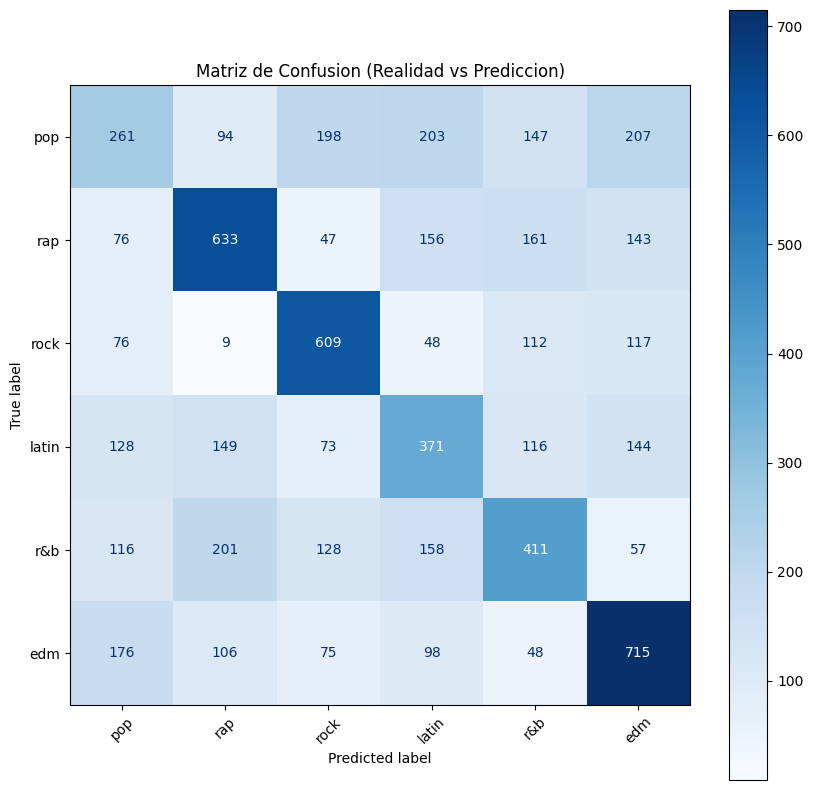

In [17]:
# Usamos el modelo para predecir el grupo de test
y_pred = modelo.predict(X_test)

# Calcular el porcentaje de acierto (Accuracy)
exactitud = accuracy_score(y_test, y_pred)

print(f"resultado")
print(f"De las {len(X_test)} canciones de prueba, el modelo acerto en:")
print(f"{exactitud * 100:.2f}%")

# Visualizar los aciertos y fallos

# Obtenemos los nombres de los géneros en orden para las etiquetas
nombres_generos = list(mapaGeneros.keys())

# Creamos el gráfico
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nombres_generos)

# Ajustamos tamaño para que se vea bien
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, cmap='Blues', values_format='d') # d es para números enteros
plt.title("Matriz de Confusion (Realidad vs Prediccion)")
plt.xticks(rotation=45)
plt.show()

## Optimizar parámetros del modelo

Probando C =0.001 = Precisión: 38.78%
Probando C =0.01 = Precisión: 43.49%
Probando C =0.1 = Precisión: 45.65%
Probando C =1 = Precisión: 45.68%
Probando C =10 = Precisión: 45.80%
Probando C =100 = Precisión: 45.73%


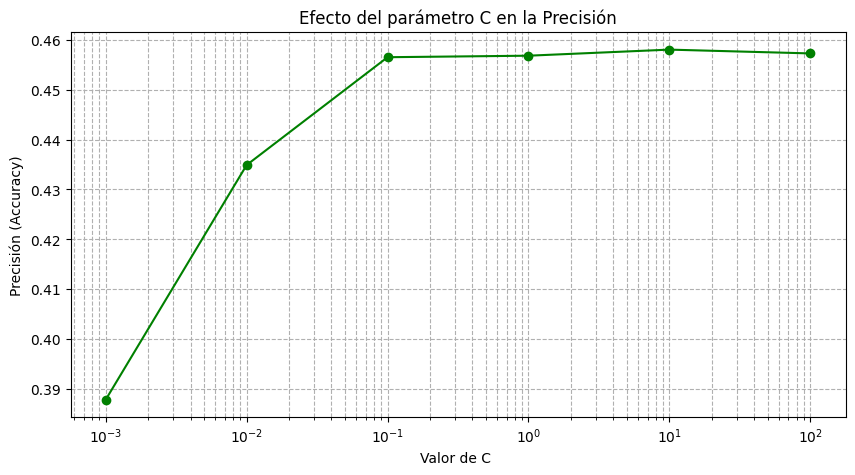


El mejor valor fue C = 10 con un 45.80% de acierto.


In [18]:
# Definimos los valores de C que queremos probar
valores_C = [0.001, 0.01, 0.1, 1, 10, 100]

lista_accuracy = []

# Bucle para probar cada valor
for c in valores_C:
    # Creamos el modelo con el C actual y max_iter alto para que no falle
    modelo_temp = LogisticRegression(C=c, max_iter=1000)

    # Entrenamos
    modelo_temp.fit(X_train, y_train)

    # Predecimos y evaluamos
    y_pred_temp = modelo_temp.predict(X_test)
    acc = accuracy_score(y_test, y_pred_temp)

    # Guardamos el resultado
    lista_accuracy.append(acc)

    print(f"Probando C ={c} = Precisión: {acc*100:.2f}%")

# Visualizar los resultados para elegir el mejor
plt.figure(figsize=(10, 5))
plt.plot(valores_C, lista_accuracy, marker='o', linestyle='-', color='green')
plt.xscale('log') # Escala logarítmica porque los valores de C crecen multiplicándose
plt.title("Efecto del parámetro C en la Precisión")
plt.xlabel("Valor de C ")
plt.ylabel("Precisión (Accuracy)")
plt.grid(True, which="both", ls="--")
plt.show()

# Conclusion automática
mejor_acc = max(lista_accuracy)
mejor_c = valores_C[lista_accuracy.index(mejor_acc)]
print(f"\nEl mejor valor fue C = {mejor_c} con un {mejor_acc*100:.2f}% de acierto.")

## Graficar el acierto del modelo

Una vez tengamos el modelo optimizado con el mejor valor de C, usaremos el modelo con el grupo de datos de test para graficar un diagrama de sectores (pie chart) que muestre cuántas canciones han sido bien categorizadas y cuántas no.

Mejor C encontrado: 10 (Precisión: 45.80%)

Detalles de los resultados
y_encoded
Mal Categorizadas     3559
Bien Categorizadas    3008
Name: count, dtype: int64


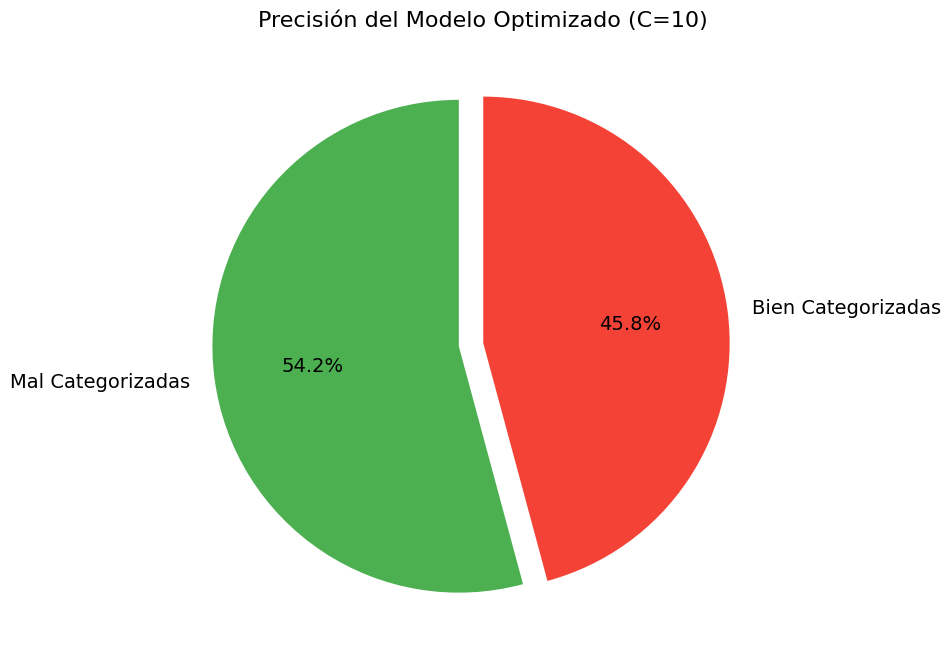

In [19]:
# Repetimos la busqueda rapida para asegurarnos de usar el mejor C
valores_C = [0.001, 0.01, 0.1, 1, 10, 100]
mejor_c = 1
mejor_accuracy = 0

for c in valores_C:
    modelo_temp = LogisticRegression(C=c, max_iter=1000)
    modelo_temp.fit(X_train, y_train)
    acc = modelo_temp.score(X_test, y_test)

    if acc > mejor_accuracy:
        mejor_accuracy = acc
        mejor_c = c

print(f"Mejor C encontrado: {mejor_c} (Precisión: {mejor_accuracy*100:.2f}%)")

# entrenar el modelo final
modelo_optimizado = LogisticRegression(C=mejor_c, max_iter=1000)
modelo_optimizado.fit(X_train, y_train)

# predecir y evaluar
y_pred = modelo_optimizado.predict(X_test)

# Comparar predicción con realidad True si acertó, False si falló
resultados = (y_pred == y_test)
conteo_resultados = resultados.value_counts()

# Cambiar los nombres del índice para que el gráfico se entienda bien
conteo_resultados = conteo_resultados.rename({True: 'Bien Categorizadas', False: 'Mal Categorizadas'})

print("\nDetalles de los resultados")
print(conteo_resultados)

# Graficar piechart
plt.figure(figsize=(8, 8))

# Definimos colores: Verde para aciertos, Rojo para fallos
colores = ['#66b3ff', '#ff9999'] if conteo_resultados.index[0] == 'Bien Categorizadas' else ['#ff9999', '#66b3ff']
# Ajuste los colores para asegurar que Bien sea azul/verde y Mal sea rojo, dependiendo del orden

plt.pie(conteo_resultados,
        labels=conteo_resultados.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#4CAF50', '#F44336'], # Verde y Rojo
        explode=(0.1, 0), # Separar un poco la rebanada de aciertos para destacar
        textprops={'fontsize': 14})

plt.title(f"Precisión del Modelo Optimizado (C={mejor_c})", fontsize=16)
plt.show()

## Conclusiones

## Conclusiones y Pruebas del Modelo

Tras completar el análisis y el entrenamiento, procedemos a evaluar el rendimiento global del modelo y su aplicabilidad en un entorno real.

### Evaluación de Resultados
En este apartado, valoramos la precisión obtenida y determinamos si el modelo de **Regresión Logística** es una herramienta robusta para la clasificación automática de géneros. ¿Es este sistema lo suficientemente fiable como para que una plataforma como **Spotify** lo utilice para catalogar automáticamente nuevos lanzamientos?

### Simulación de Nuevos Lanzamientos (Test de Estrés)
Para poner a prueba la capacidad predictiva del modelo fuera del dataset original, generamos "canciones sintéticas". Al asignar valores personalizados a variables como la *danceability*, *energy* o *acousticness*, podemos observar cómo el modelo interpreta estas características y qué etiqueta de género les asigna.

Este experimento nos permite entender los límites del algoritmo y cómo las variaciones en la composición musical afectan a su clasificación.

In [20]:
# Definimos las características de las canciones
nuevas_canciones = pd.DataFrame([
    {
        # cancion 1: guaracha galactica
        'nombre': 'Guaracha Galactica',
        'danceability': 0.85,   # Se baila rapido
        'energy': 0.98,         # Energia intensa
        'key': 11,              # Tonalidad
        'loudness': -2.0,       # Volumen saturado/muy alto
        'mode': 1,
        'speechiness': 0.05,    # Poca letra
        'acousticness': 0.01,   # Sonido 100% sintético
        'instrumentalness': 0.85, # Casi todo instrumental
        'liveness': 0.1,
        'valence': 0.8,         # Ambiente de fiesta
        'tempo': 130,           # Tempo clásico de Guaracha/House
        'duration_ms': 180000   # 3 min
    },
    {
        # Cancion 2: perreo intenso
        'nombre': 'Perreo Hasta el Suelo',
        'danceability': 0.98,   # full bailable
        'energy': 0.85,         # Fuerte
        'key': 1,
        'loudness': -3.5,       # Bajos potentes
        'mode': 1,
        'speechiness': 0.25,    # Bastante letra/rapeo
        'acousticness': 0.1,    # ritmo urbano
        'instrumentalness': 0.0, # Tiene voz
        'liveness': 0.05,
        'valence': 0.7,         # Actitud de fiesta
        'tempo': 96,            # El tempo perfecto para perrear
        'duration_ms': 210000   # 3 min y medio
    }
])

# Seleccionamos las columnas correctas
cols_modelo = ['danceability', 'energy', 'key', 'loudness', 'mode',
               'speechiness', 'acousticness', 'instrumentalness',
               'liveness', 'valence', 'tempo', 'duration_ms']

X_nuevas = nuevas_canciones[cols_modelo]

# Usamos el scaler que ya tenías entrenado
X_nuevas_scaled = scaler.transform(X_nuevas)

#Predecir
prediccion_ids = modelo_optimizado.predict(X_nuevas_scaled)

#Mostrar resultados
print("Clasificacion de las canciones")

for i, nombre in enumerate(nuevas_canciones['nombre']):
    id_predicho = prediccion_ids[i]
    genero_texto = diccionario_numeros_a_nombres[id_predicho]

    print(f"\nCanción: {nombre}")
    print(f"Clasificada como: {genero_texto.upper()}")

Clasificacion de las canciones

Canción: Guaracha Galactica
Clasificada como: EDM

Canción: Perreo Hasta el Suelo
Clasificada como: RAP


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### ¿Podría usarlo Spotify?
No, no podría usarse como sistema de catalogación automático.

Con un porcentaje de acierto del 50-55%, el modelo clasifica erróneamente casi la mitad de las canciones nuevas. Para una empresa como Spotify, esto sería inaceptable, ya que arruinaría las listas de recomendaciones y la experiencia del usuario.

Solo serviría como una herramienta de apoyo para hacer un pre-filtro rápido, pero siempre requeriría supervisión humana o de algoritmos más complejos para confirmar el género final.